In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OrdinalEncoder,power_transform,StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
!pip install scikit-plot
import scikitplot as skplt
import plotly.express as px
# import klib

In [14]:
data=pd.read_csv("C:/Users/Asus/Downloads/train (1).csv")

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
data.shape

(891, 12)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
data.isna().sum().sort_values(ascending=False).head(22)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

EDA

**Univariate**

<AxesSubplot:xlabel='Survived', ylabel='count'>

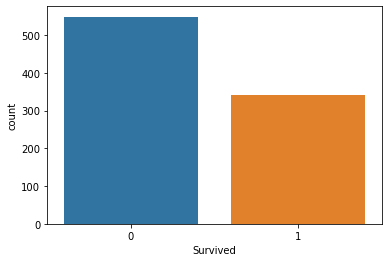

In [20]:
sns.countplot(x='Survived', data=data)


Here 0 represents the no of passengers did not survive and 1 represents that passengers survived

<AxesSubplot:xlabel='Sex', ylabel='count'>

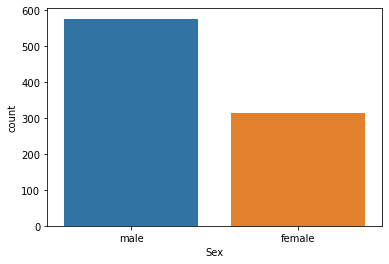

In [21]:
sns.countplot(x='Sex', data=data)

As we see males were more as compared to females

**Multivariate**

In [22]:
col=['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'CabinEmbarked']

Text(0.5, 1.0, 'Survived Vs Age')

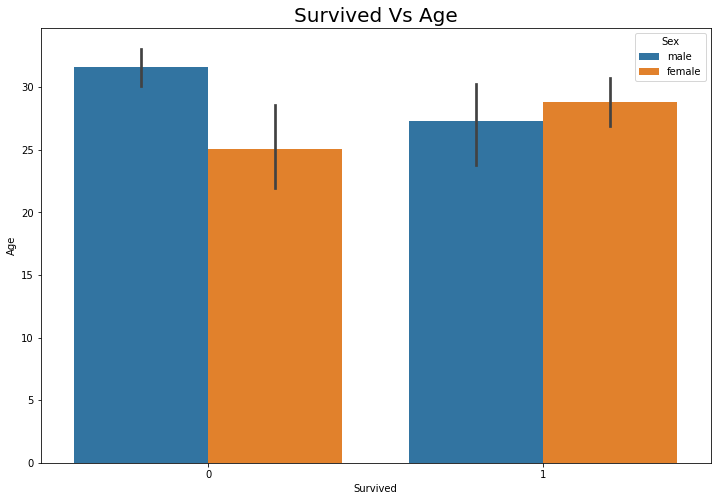

In [28]:
plt.figure(figsize=(12,8))
sns.barplot(x='Survived',y='Age',data=data,hue='Sex')
plt.title("Survived Vs Age",fontsize=20)

Here as we analyse 


Female we prioritized compared to male when it to came down to survival

Text(0.5, 1.0, 'Pclass Vs Age')

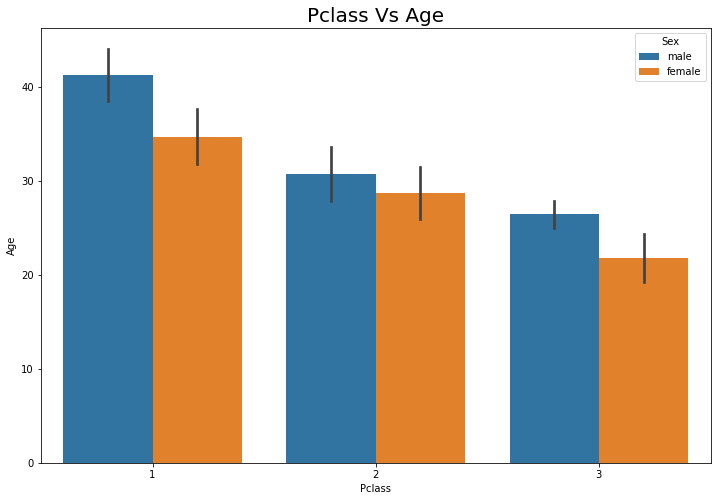

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(x='Pclass',y='Age',data=data,hue='Sex')
plt.title("Pclass Vs Age",fontsize=20)

Here the people of 40 and above booked first class tickets and they were nowhere to be found in second or third class

Text(0.5, 1.0, 'Pclass Vs Survived')

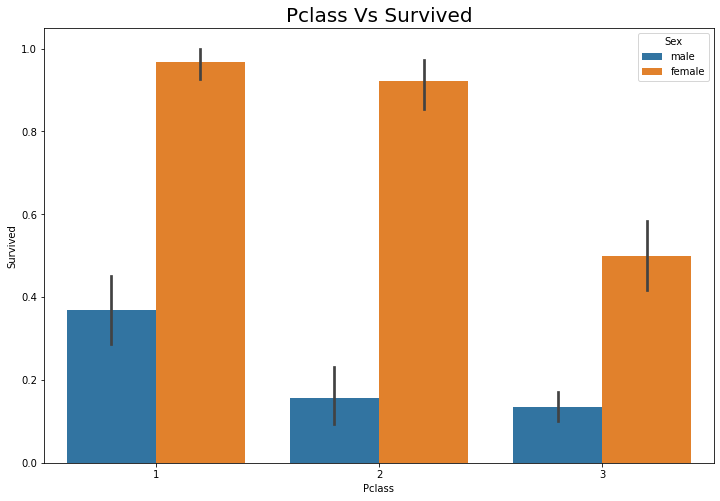

In [32]:
plt.figure(figsize=(12,8))
sns.barplot(x='Pclass',y='Survived',data=data,hue='Sex')
plt.title("Pclass Vs Survived",fontsize=20)

More females were prioritized more from first and second class and we can also see for the men as the first class one's were 
prioritized so much compared to the other classes



KDE

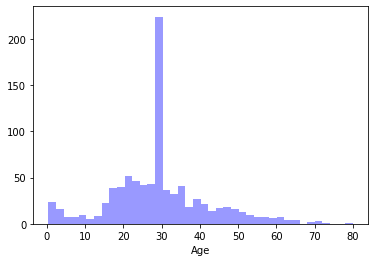

In [26]:
sns.distplot(data['Age'],kde=False,color='blue',bins=40 )

As we see the 30 aged dominated the group 

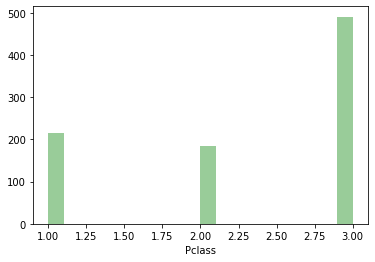

In [27]:
sns.distplot(data['Pclass'],kde=False,color='green',bins=20 )

**Handling the missing values**

In [15]:
data = data.drop(columns='Cabin', axis=1)
#dropped cabin columns as it was missing a lot of data

In [16]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
#replacing the rest of the data with mean value of age

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
print(data['Embarked'].mode())

0    S
dtype: object


As we can still see Embarked is also missing 2 values so i will fill it with mode

In [19]:
#Now we know the mode value now so we will fill it
print(data['Embarked'].mode()[0])

S


In [20]:
data.fillna(data['Embarked'].mode()[0], inplace=True)

In [21]:
data.isna().sum().sort_values(ascending=False).head(22)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
data.isna().sum().sum()

0

Now we dont have any missing values

In [122]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [123]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [129]:
def preprocessing(df):
  df = df.drop(columns='Cabin', axis=1)
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df.fillna(df['Embarked'].mode()[0], inplace=True)

  #Feature engineering
  df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
  df['IsAlone'] = 0
  df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
  df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)
  X=df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
  y=df['Survived']
  return X,y

In [130]:
X,y=preprocessing(data)

In [131]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.000000,1,0,7.2500,0,2,0
1,1,1,38.000000,1,0,71.2833,1,2,0
2,3,1,26.000000,0,0,7.9250,0,1,1
3,1,1,35.000000,1,0,53.1000,0,2,0
4,3,0,35.000000,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,0,1,1
887,1,1,19.000000,0,0,30.0000,0,1,1
888,3,1,29.699118,1,2,23.4500,0,4,0
889,1,0,26.000000,0,0,30.0000,1,1,1


In [132]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [133]:
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [62]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
!pip install scikit-plot
import scikitplot as skplt
from lightgbm import LGBMClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [135]:
LGBM=LGBMClassifier(boosting_type= 'dart',
 importance_type= 'split',
 learning_rate= 0.1,
 n_estimators= 500)

In [136]:
new_csv=cross_val_score(LGBM,X,y,cv=5).mean()
new_csv

0.8170861841692298

In [138]:
LGBM.fit(X_train,y_train)
y_p=LGBM.predict(X_test)
print(accuracy_score(y_test,y_p))

0.7877094972067039


ROC AUC CURVE


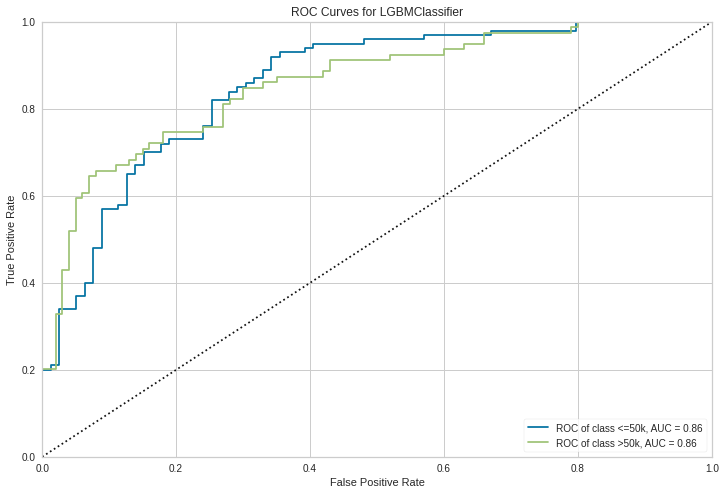

MODEL LEARNING CURVE


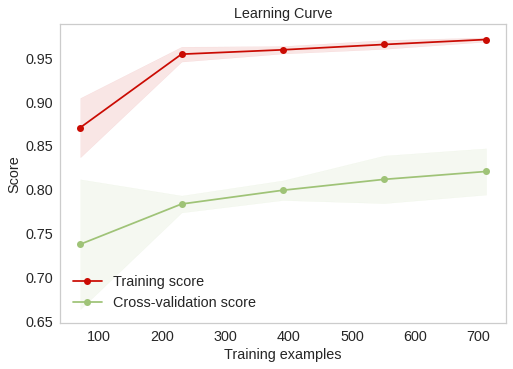

In [71]:
print("ROC AUC CURVE")
plt.figure(figsize=(12,8))
roc_auc(LGBM,X_train,y_train,X_test=X_test,y_test=y_test,classes=['<=50k','>50k'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(LGBM,X,y,cv=5,scoring='accuracy',text_fontsize='large')
plt.show()

In [139]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [78]:
print("Confusion matrics")
print('\n')
print(confusion_matrix(y_test,y_p))
print("Classifiaction_report")
print('\n')
print(classification_report(y_test,y_p))
print("precision_score")
print("\n")
print(precision_score(y_test,y_p))
print("recall_score")
print("\n")
print(recall_score(y_test,y_p))

Confusion matrics


[[87 13]
 [25 54]]
Classifiaction_report


              precision    recall  f1-score   support

           0       0.78      0.87      0.82       100
           1       0.81      0.68      0.74        79

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.78       179

precision_score


0.8059701492537313
recall_score


0.6835443037974683


In [159]:
df=pd.read_csv('/content/test (2).csv')

In [177]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2,1,1
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0,3,0


In [173]:
def prediction_pipeline(path):
  df=pd.read_csv(path)
  df = df.drop(columns='Cabin', axis=1)
  df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
  df.fillna(0.0,inplace=True)
  df['Age'].fillna(df['Age'].mean(), inplace=True)
  df.fillna(df['Embarked'].mode()[0], inplace=True)

  #Feature engineering
  df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
  df['IsAlone'] = 0
  df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
  df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)
  X=df.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1)
  y_p=LGBM.predict(X)
  return y_p

In [174]:
y_p=prediction_pipeline('/content/test (2).csv')

In [175]:
y_p

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,